In [1]:
%store -r __import

In [2]:
__import

# Diary

### 10/10
Initial EDA. Seen the percentage for some columns, possibly I will use PandasProfiling. Furthermore, I need to explore more relations between the features, check correlations and variance.
Another important point is ask questions that are more complex, such as: given a user, what was the questions he questioned more, whats the connection between the contet and if the question was answered correctly.

In [3]:
train_df = pd.read_feather('/home/tuts/datasets/riid/train_raw')

In [4]:
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int16(2), int32(1), int64(2), int8(3)
memory usage: 3.1 GB


<AxesSubplot:>

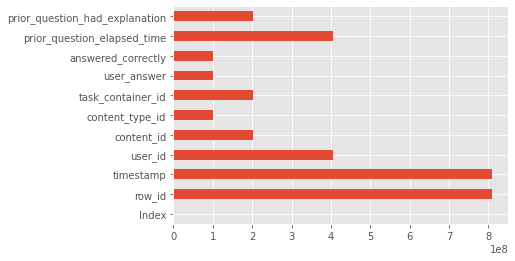

In [7]:
train_df.memory_usage().plot.barh()

In [8]:
train_df.isna().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

### 393_656 unique users

In [7]:
train_df.user_id.nunique()

393656

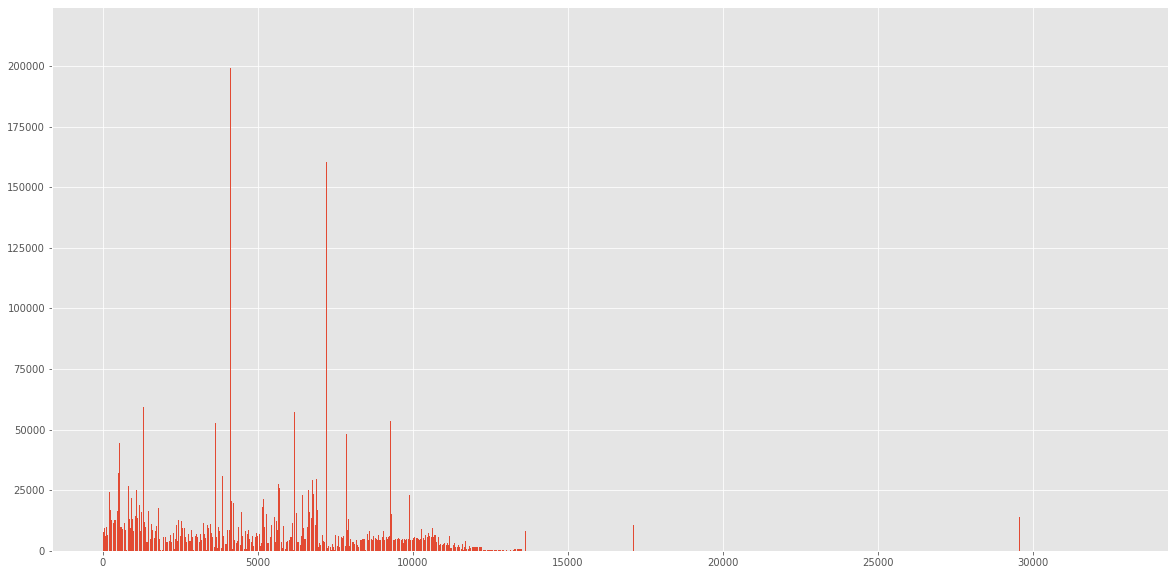

In [9]:
xy = train_df.content_id.value_counts()

plt.figure(figsize=(20,10))
plt.bar(x=xy.index, height=xy.values);

### 98% of the content type is a question being posed by the user

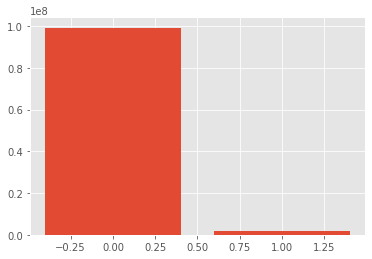

In [10]:
content_type = train_df.content_type_id.value_counts()
plt.bar(x=content_type.index, height=content_type.values);

In [11]:
content_type

0    99271300
1     1959032
Name: content_type_id, dtype: int64

In [13]:
content_type[0]/train_df.shape[0]

0.9806477765972357

### Percentage of right and wrong answers, respectively:

In [15]:
correct_answers = train_df.answered_correctly.value_counts()

In [19]:
correct_answers[1]/(correct_answers[1] + correct_answers[0])

0.6572355454194717

In [20]:
correct_answers[0]/(correct_answers[1] + correct_answers[0])

0.3427644545805283